In [2]:
import pandas as pd

In [3]:
master = pd.read_csv('master_with_neighborhood_for_census.csv')

In [4]:
neighborhood = pd.read_csv('boston_neighborhood.csv')

In [5]:
neighborhood.head()

,nbhd,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others,P0040001,P0040005,P0040006,...,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,hhsize
0,field concept,Total:,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander al...","Other Races or Multiple Races, all ages",Total:,White alone,Black or African American alone,...,Nursing facilities/Skilled-nursing facilities,Other institutional facilities,Noninstitutionalized population:,College/University student housing,Military quarters,Other noninstitutional facilities,Total:,Occupied,Vacant,household size
1,Allston,28621,14634,1451,3657,7173,1706,26668,14022,1294,...,26,0,3364,3214,0,150,12527,11740,787,2.149148211
2,Back Bay,19588,14056,718,1326,2604,884,18374,13296,669,...,269,0,1701,1578,0,123,12373,10788,1585,1.633110864
3,Beacon Hill,9336,7521,252,537,630,396,8603,6980,231,...,0,0,33,0,0,33,6037,5485,552,1.696080219
4,Brighton,48330,30596,2289,4978,7801,2666,44129,28706,1966,...,240,56,3713,3493,0,220,21874,20822,1052,2.1279416


In [6]:
#df.groupby("A").agg(
#    b_min=pd.NamedAgg(column="B", aggfunc="min"),
#    c_sum=pd.NamedAgg(column="C", aggfunc="sum"))

n_u = master.groupby('NEIGHBORHOOD').agg(
    affordable = pd.NamedAgg(column='Is_Affordable_Master', aggfunc = "sum")
).reset_index()

In [7]:
voter_and_aff = n_u.set_index('NEIGHBORHOOD').join(neighborhood.set_index('nbhd')).reset_index()

In [8]:
voter_and_aff

,NEIGHBORHOOD,affordable,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others,P0040001,P0040005,...,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,hhsize
0,Allston,195,28621,14634,1451,3657,7173,1706,26668,14022,...,26,0,3364,3214,0,150,12527,11740,787,2.149148211
1,Back Bay,211,19588,14056,718,1326,2604,884,18374,13296,...,269,0,1701,1578,0,123,12373,10788,1585,1.633110864
2,Beacon Hill,204,9336,7521,252,537,630,396,8603,6980,...,0,0,33,0,0,33,6037,5485,552,1.696080219
3,Brighton,35,48330,30596,2289,4978,7801,2666,44129,28706,...,240,56,3713,3493,0,220,21874,20822,1052,2.1279416
4,Brookline,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Charlestown,3,19120,13626,990,2075,1650,779,15661,11689,...,55,0,55,0,30,25,9525,8932,593,2.128302732
6,Chinatown,193,7143,1898,297,477,4281,190,6343,1790,...,224,0,457,443,0,14,3644,3299,345,1.958775386
7,Dorchester,14,122191,27411,42714,25285,13360,13421,95365,24327,...,291,0,936,0,0,936,47965,44823,3142,2.692323138
8,Downtown,0,13451,9174,537,961,2286,493,12675,8764,...,97,0,4116,3283,0,833,6654,5401,1253,1.710423996
9,East Boston,17,43066,15760,1403,21700,1932,2271,34826,14039,...,132,0,109,0,0,109,18016,16695,1321,2.564420485


In [9]:
import matplotlib.pyplot as plt

In [10]:
voter_and_aff['P0020005'].fillna('0').astype(int)

0     14634
1     14056
2      7521
3     30596
4         0
5     13626
6      1898
7     27411
8      9174
9     15760
10    20456
11        0
12     7449
13    22032
14        0
15        0
16     1489
17     9306
18        0
19        0
20    13428
21     7182
22        0
23    29139
24    16618
25     4933
26    20918
27        0
Name: P0020005, dtype: int64

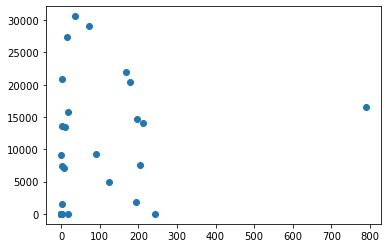

In [11]:
plt.scatter(voter_and_aff['affordable'],voter_and_aff['P0020005'].fillna('0').astype(int))  ##white only

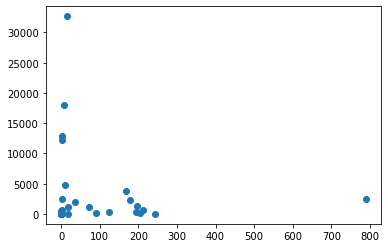

In [12]:
plt.scatter(voter_and_aff['affordable'],voter_and_aff['P0040006'].fillna('0').astype(int)) ##black only

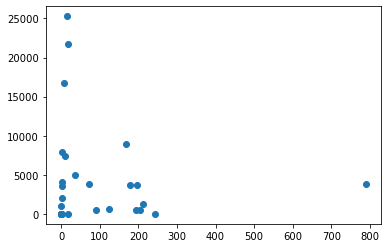

In [13]:
#P0020002
plt.scatter(voter_and_aff['affordable'],voter_and_aff['P0020002'].fillna('0').astype(int)) ##hispanic

In [14]:
voter_and_aff['black_ratio'] = voter_and_aff['P0040006'].fillna('0').astype(int)/voter_and_aff['P0040005'].fillna('0').astype(int)
voter_and_aff['aff_per_cap'] = voter_and_aff['affordable']/voter_and_aff['H0010001'].fillna('0').astype(int)  #per capit affordable units

voter_and_aff['hisp_ratio'] = voter_and_aff['P0020002'].fillna('0').astype(int)/voter_and_aff['P0040005'].fillna('0').astype(int)
voter_and_aff['all_ratio']  = (voter_and_aff['P0040001'].fillna('0').astype(int) - voter_and_aff['P0040005'].fillna('0').astype(int))/voter_and_aff['P0040005'].fillna('0').astype(int)


In [18]:
bias_plt = voter_and_aff[['black_ratio','hisp_ratio','all_ratio','aff_per_cap','NEIGHBORHOOD']]

ratio = bias_plt['black_ratio'] ##black divided by white pop
hisp_ratio = bias_plt['hisp_ratio']  #hisp divided by white pop
all_ratio = bias_plt['all_ratio'] #non white divided by white pop
per_cap = bias_plt['aff_per_cap']
n_labels = bias_plt['NEIGHBORHOOD']

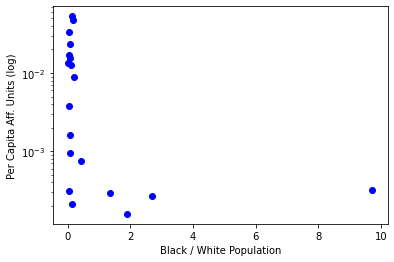

In [19]:
import numpy as np
#a, b = np.polyfit(black_to_white.fillna(0),voter_and_aff['affordable'], 1)
#plt.xlim([-0.1, 0.5])
#plt.ylim([-0.2, 300])



plt.scatter(ratio,per_cap, color = 'blue', label=n_labels)
plt.yscale('log')
plt.ylabel('Per Capita Aff. Units (log)')
plt.xlabel('Black / White Population')
plt.show()
#plt.plot(black_to_white.fillna(0), a*black_to_white.fillna(0)+b, color='red')



Text(0.5, 0, 'Non-White / White')

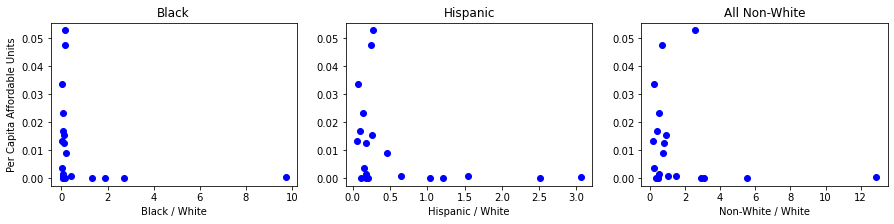

In [20]:
fig, ax = plt.subplots(1, 3,figsize=(15, 3))


ax[0].scatter(ratio,per_cap, color = 'blue', label=n_labels)
ax[0].set_title('Black')  ###Mattapan is the far right outlier for all 3 sets.  
ax[0].set_ylabel('Per Capita Affordable Units')
ax[0].set_xlabel('Black / White')

##nothing downtown

ax[1].scatter(hisp_ratio,per_cap, color = 'blue', label=n_labels)
ax[1].set_title('Hispanic') ##roxbury is the 2.5
ax[1].set_xlabel('Hispanic / White')

ax[2].scatter(all_ratio,per_cap, color = 'blue', label=n_labels)
ax[2].set_title('All Non-White')  ##chinatown has the most per capita units, and its mostly non-black non-hispanic and white.
ax[2].set_xlabel('Non-White / White')

In [22]:
bias_plt.sort_values(by=['aff_per_cap']).to_csv('affordability_by_Neighborhood.csv') ##just write to file
bias_plt.sort_values(by=['aff_per_cap'])

,black_ratio,hisp_ratio,all_ratio,aff_per_cap,NEIGHBORHOOD
8,0.060361,0.109653,0.446257,0.000000,Downtown
12,1.883123,1.216662,3.076070,0.000159,Hyde Park
26,0.135721,0.201799,0.440201,0.000213,West Roxbury
21,2.705750,2.511335,5.530851,0.000272,Roxbury
7,1.343281,1.039380,2.920130,0.000292,Dorchester
5,0.056634,0.177517,0.339807,0.000315,Charlestown
16,9.722973,3.062312,12.897147,0.000321,Mattapan
20,0.412676,0.641912,1.055024,0.000743,Roslindale
9,0.080917,1.545694,1.480661,0.000944,East Boston
3,0.068487,0.173413,0.537274,0.001600,Brighton


In [24]:
master[['RC_UNITS','OWN_OCC']].value_counts()

RC_UNITS  OWN_OCC
0         N          98364
          Y          77072
106       N            235
80        N            162
105       N            135
                     ...  
13        N              9
          Y              7
2         N              4
90        N              3
2         Y              2
Length: 72, dtype: int64

<AxesSubplot:ylabel='OWN_OCC,Is_Affordable_Master'>

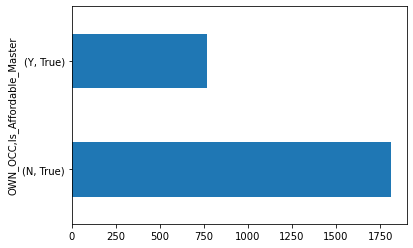

In [25]:
master[['OWN_OCC','Is_Affordable_Master']].loc[master['Is_Affordable_Master']].value_counts().plot(kind='barh')

<AxesSubplot:>

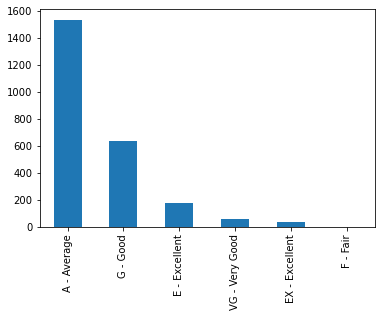

In [26]:
aff_condition = master['OVERALL_COND'].loc[master['Is_Affordable_Master']]
all_condition =  master['OVERALL_COND'].loc[~master['Is_Affordable_Master']]
aff_condition.value_counts().plot(kind='bar')
#master[['OVERALL_COND','Is_Affordable_Master']].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Affordable Unit Quality'}, ylabel='Number of Units'>

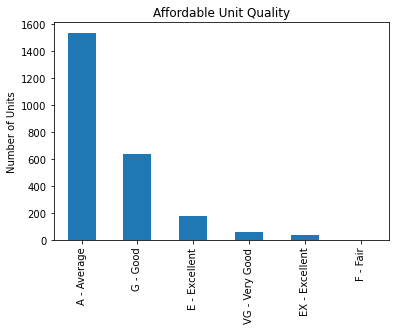

In [27]:
aff_condition = master['OVERALL_COND'].loc[master['Is_Affordable_Master']]
all_condition =  master['OVERALL_COND'].loc[~master['Is_Affordable_Master']]



aff_condition.value_counts().plot(kind='bar',title='Affordable Unit Quality', ylabel = 'Number of Units')


#bb.show()


<AxesSubplot:title={'center':'Non-Affordable Unit Quality'}, ylabel='Number of Units'>

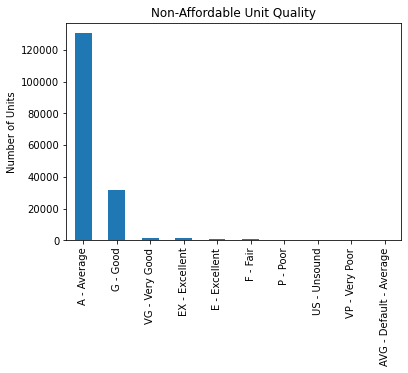

In [28]:
all_condition.value_counts().plot(kind='bar',title='Non-Affordable Unit Quality', ylabel = 'Number of Units')

In [30]:
scatter_data = master[['YR_BUILT','BLDG_VALUE','Is_Affordable_Master']].dropna().sample(10000)
scatter_data['BLDG_VALUE'] = scatter_data.apply(lambda x : int(x['BLDG_VALUE'].replace(',','')),axis = 1)

In [31]:
colors = ['red' if i else 'green' for i in scatter_data['Is_Affordable_Master'].values]

Text(0.5, 1.0, 'Building value and Year Built')

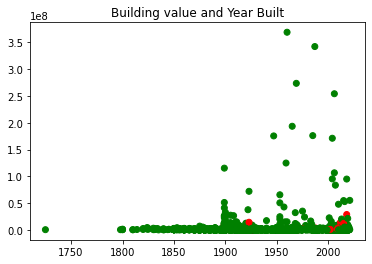

In [32]:
plt.scatter(scatter_data['YR_BUILT'].values,scatter_data['BLDG_VALUE'].astype(int).values,color = colors)
plt.title('Building value and Year Built')

In [33]:
scatter_data.sample(100)

,YR_BUILT,BLDG_VALUE,Is_Affordable_Master
161920,2006.0,856700,False
153651,1930.0,480900,False
44843,1885.0,423500,False
33717,1910.0,1089700,False
10532,1899.0,545900,False
...,...,...,...
125065,1950.0,245500,False
106178,1899.0,11826600,False
10595,1870.0,469900,False
31542,2004.0,1273600,False


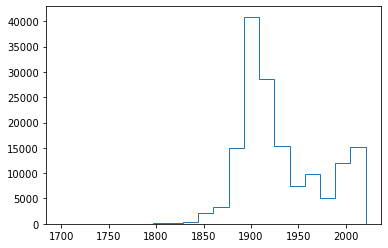

In [34]:
counts, bins = np.histogram(master['YR_BUILT'].dropna().astype(int), bins=20)
plt.stairs(counts, bins)

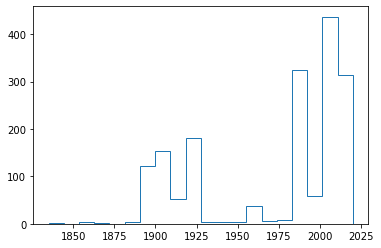

In [35]:
counts, bins = np.histogram(master['YR_BUILT'].loc[master['Is_Affordable_Master']].dropna().astype(int), bins=20)
plt.stairs(counts, bins)

In [36]:
master['RES_UNITS']


0         0
1         0
2         0
3         0
4         0
         ..
178593    0
178594    0
178595    0
178596    0
178597    0
Name: RES_UNITS, Length: 178598, dtype: int64